In [204]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [205]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [206]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [ ]:
""""there are 31647 rows and 18 columns
dataset is having various parameters personal and financial
subscribe is our target and we have to predict whether person subscribe or not
data needs to be encoded

In [207]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
"""" no null values found """"

In [208]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#count is complete
# age balance day duration campaign pdays previous is having outliers on first impression

In [209]:
for i in df.columns:
    print(df[i].value_counts())

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

In [210]:
#age is having 76 unique values.Young Age people are higher
#Job type is having 12 categories
#marital status is having 3 categories.
#defaulter is whether yes or no only.
#balance is continous data.
#housing and loan both have only 2 categories.
#subscribe, contact, loan, default, marital,education is having sample deficits.Need to be treated. 

In [211]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
le=LabelEncoder()

In [214]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [215]:
df2 = df.copy()
for col in df2.columns:
    if df2[col].dtype == 'O':
        df2[col] = le.fit_transform(df2[col])



In [216]:
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [217]:
df2.drop('ID',axis=1, inplace=True)

In [ ]:
"""" droping id as it has no use """"

In [218]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [219]:
df2.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [220]:
#dataypes are as there are suppose to be
#lets check which column is related and which can be remove.

<AxesSubplot:>

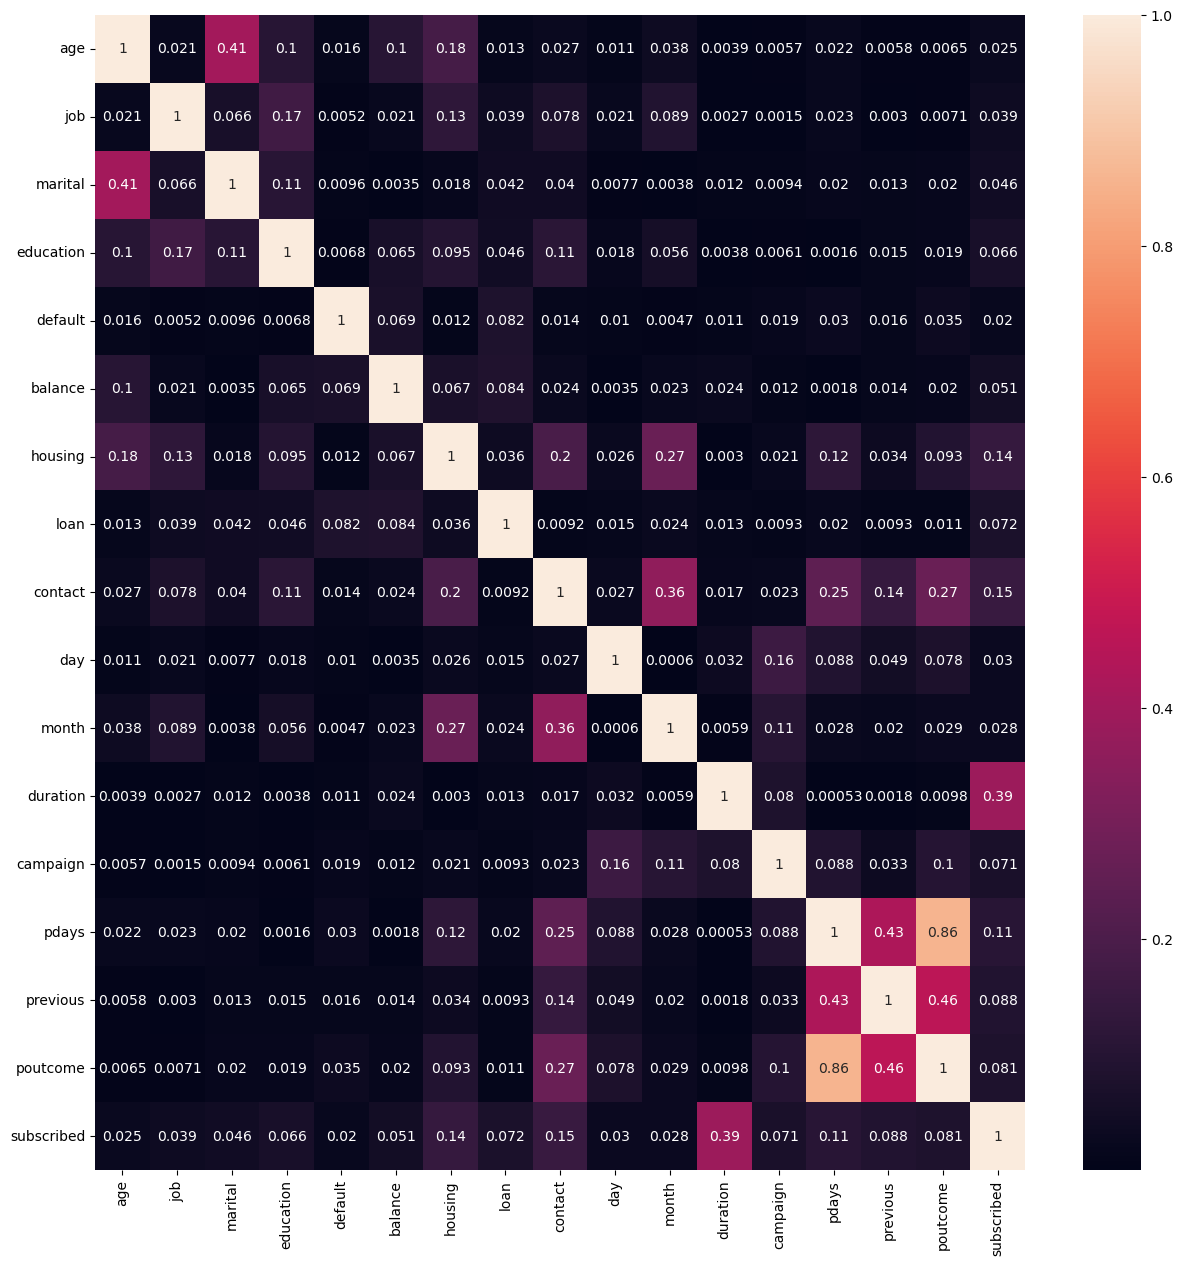

In [221]:
plt.figure(figsize=(15,15))

sns.heatmap(df2.corr().abs(), annot=True)

In [ ]:
"""" droping poutcome as it is highly co-related to pdays """"

In [222]:
df2.drop('poutcome',axis=1, inplace=True)

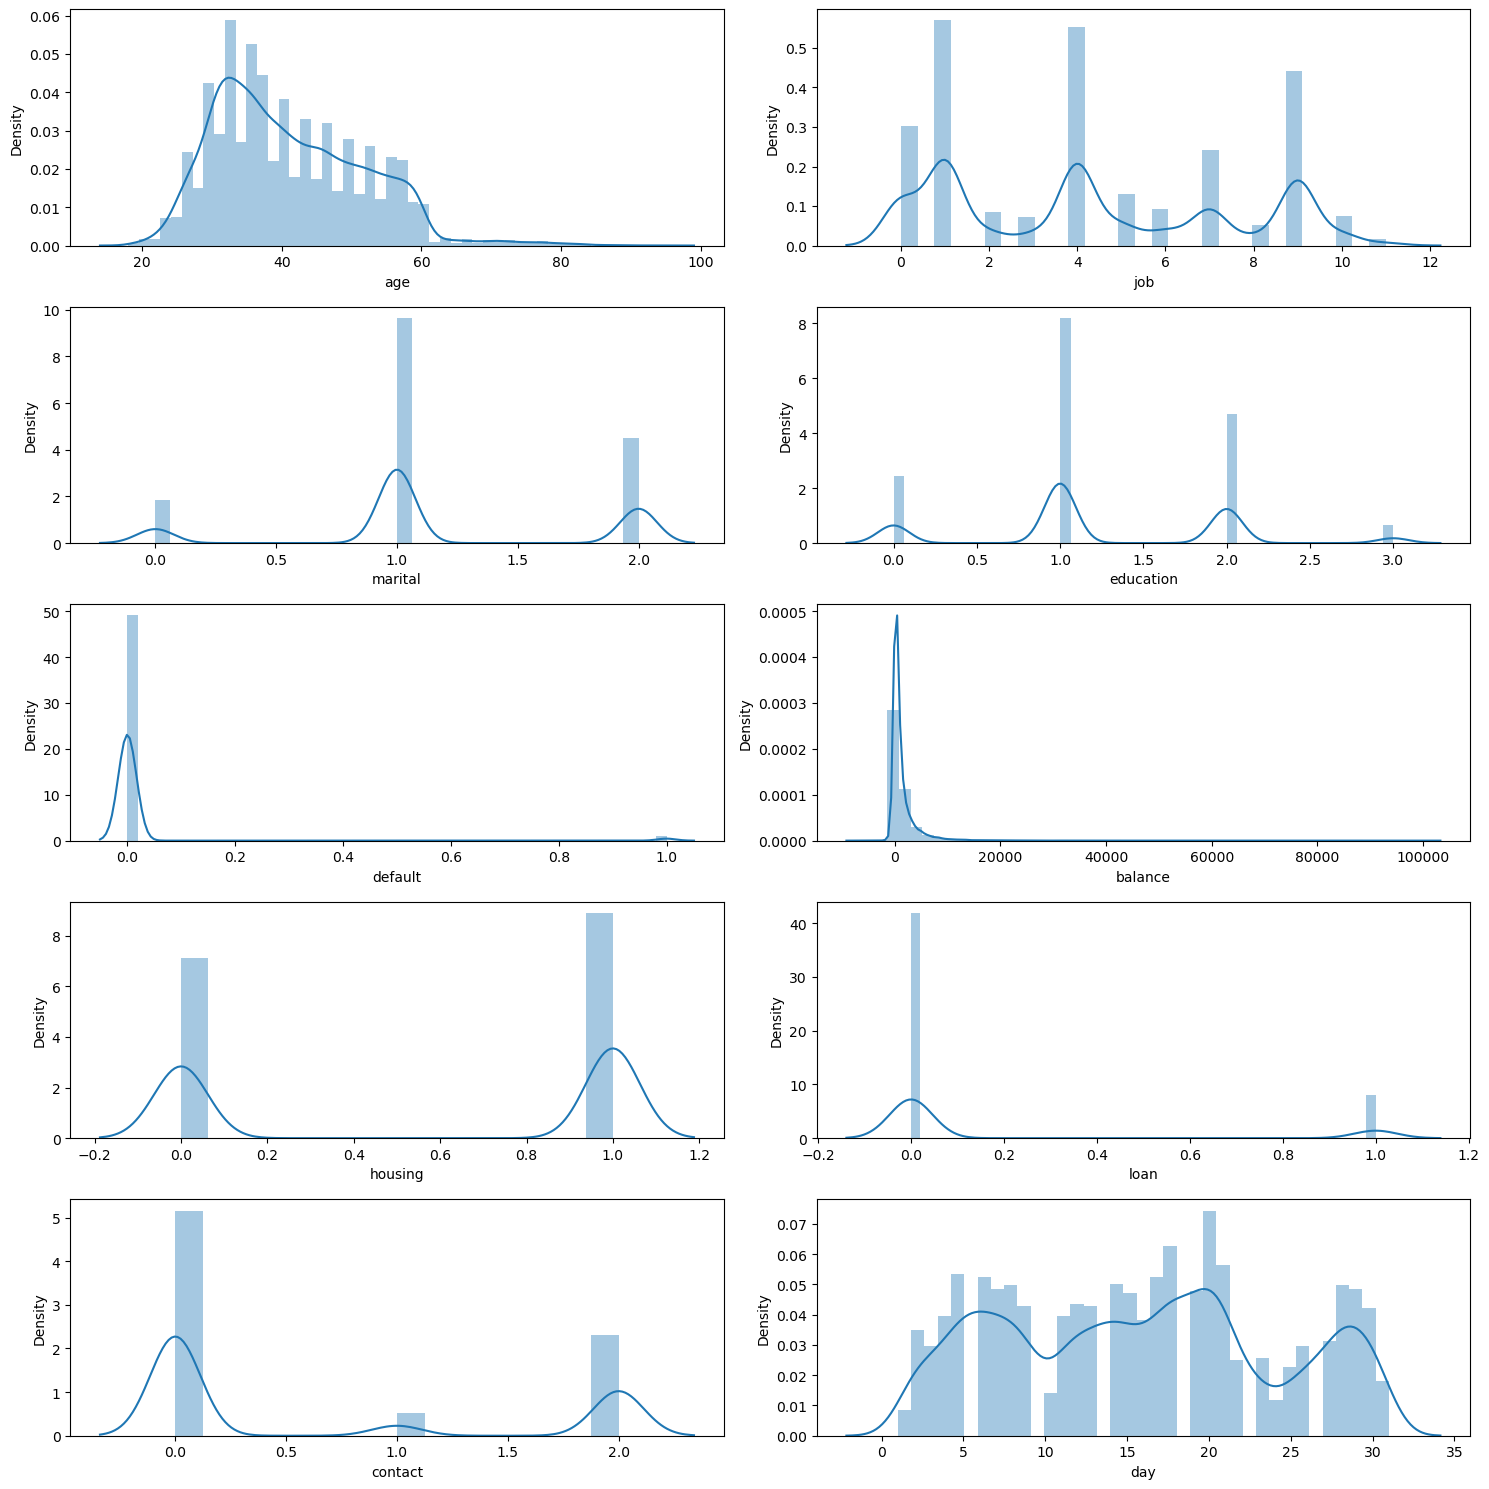

In [223]:
plt.figure(figsize=(15,15))
p=1
for column in df2:
    if p<=10:
        ax=plt.subplot(5,2,p)
        sns.distplot(df2[column])
    p+=1
plt.tight_layout()

In [ ]:
#data is not normally distributed

<AxesSubplot:xlabel='age', ylabel='balance'>

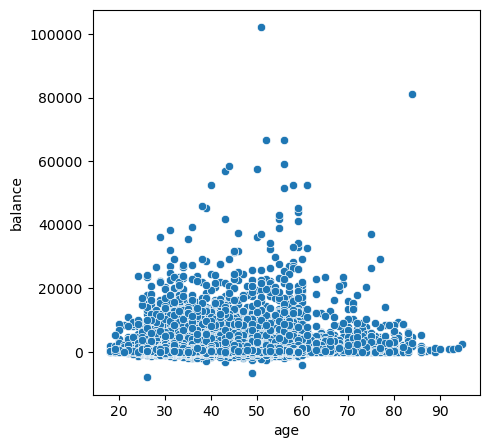

In [224]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df2['age'],y=df2['balance'])

In [225]:
print(df2['balance'].max())
print(df2['balance'].min())

102127
-8019


In [226]:
# maximum balance is 102127 and lowest is -8019 with respect to age it is found that it is not specific that with increase of age 
# balance will increase or decrease.Balance is expectional case.Most of the people maintaining low balances despite of age.

<AxesSubplot:xlabel='age', ylabel='default'>

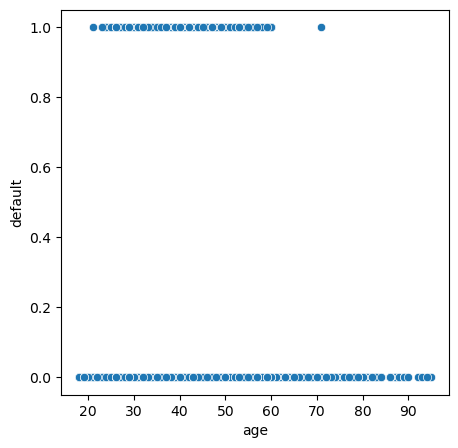

In [227]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df2['age'],y=df2['default'])

In [228]:
# it is not specific that a special age category is defaulting.But people with age lower than 60 will have chances of default.

<AxesSubplot:xlabel='age', ylabel='housing'>

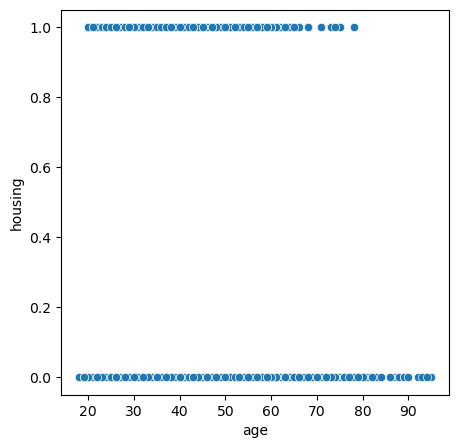

In [229]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df2['age'],y=df2['housing'])

<AxesSubplot:xlabel='age', ylabel='loan'>

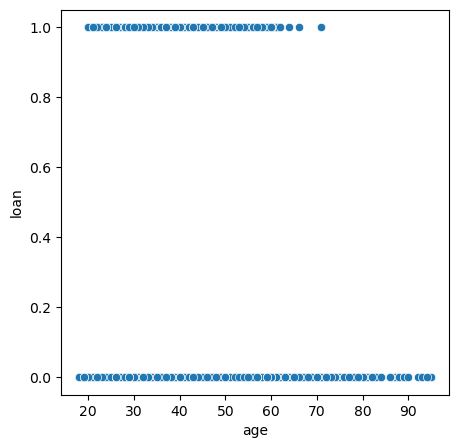

In [230]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df2['age'],y=df2['loan'])

In [231]:
# housing and personal laon are taken by people with age lower than 70.

#from these graphs we make a general decision that age is soomehow matter and effecting other factors.When age is low expenses 
# will be high.People took housing loan personal loans and money will go in repaymenet.So balance will quite low.But after a specific
# age expenses will go down and balance will increase.
#So rough idea is that most of people move on investment in higher age when expenses will be down or completely over.

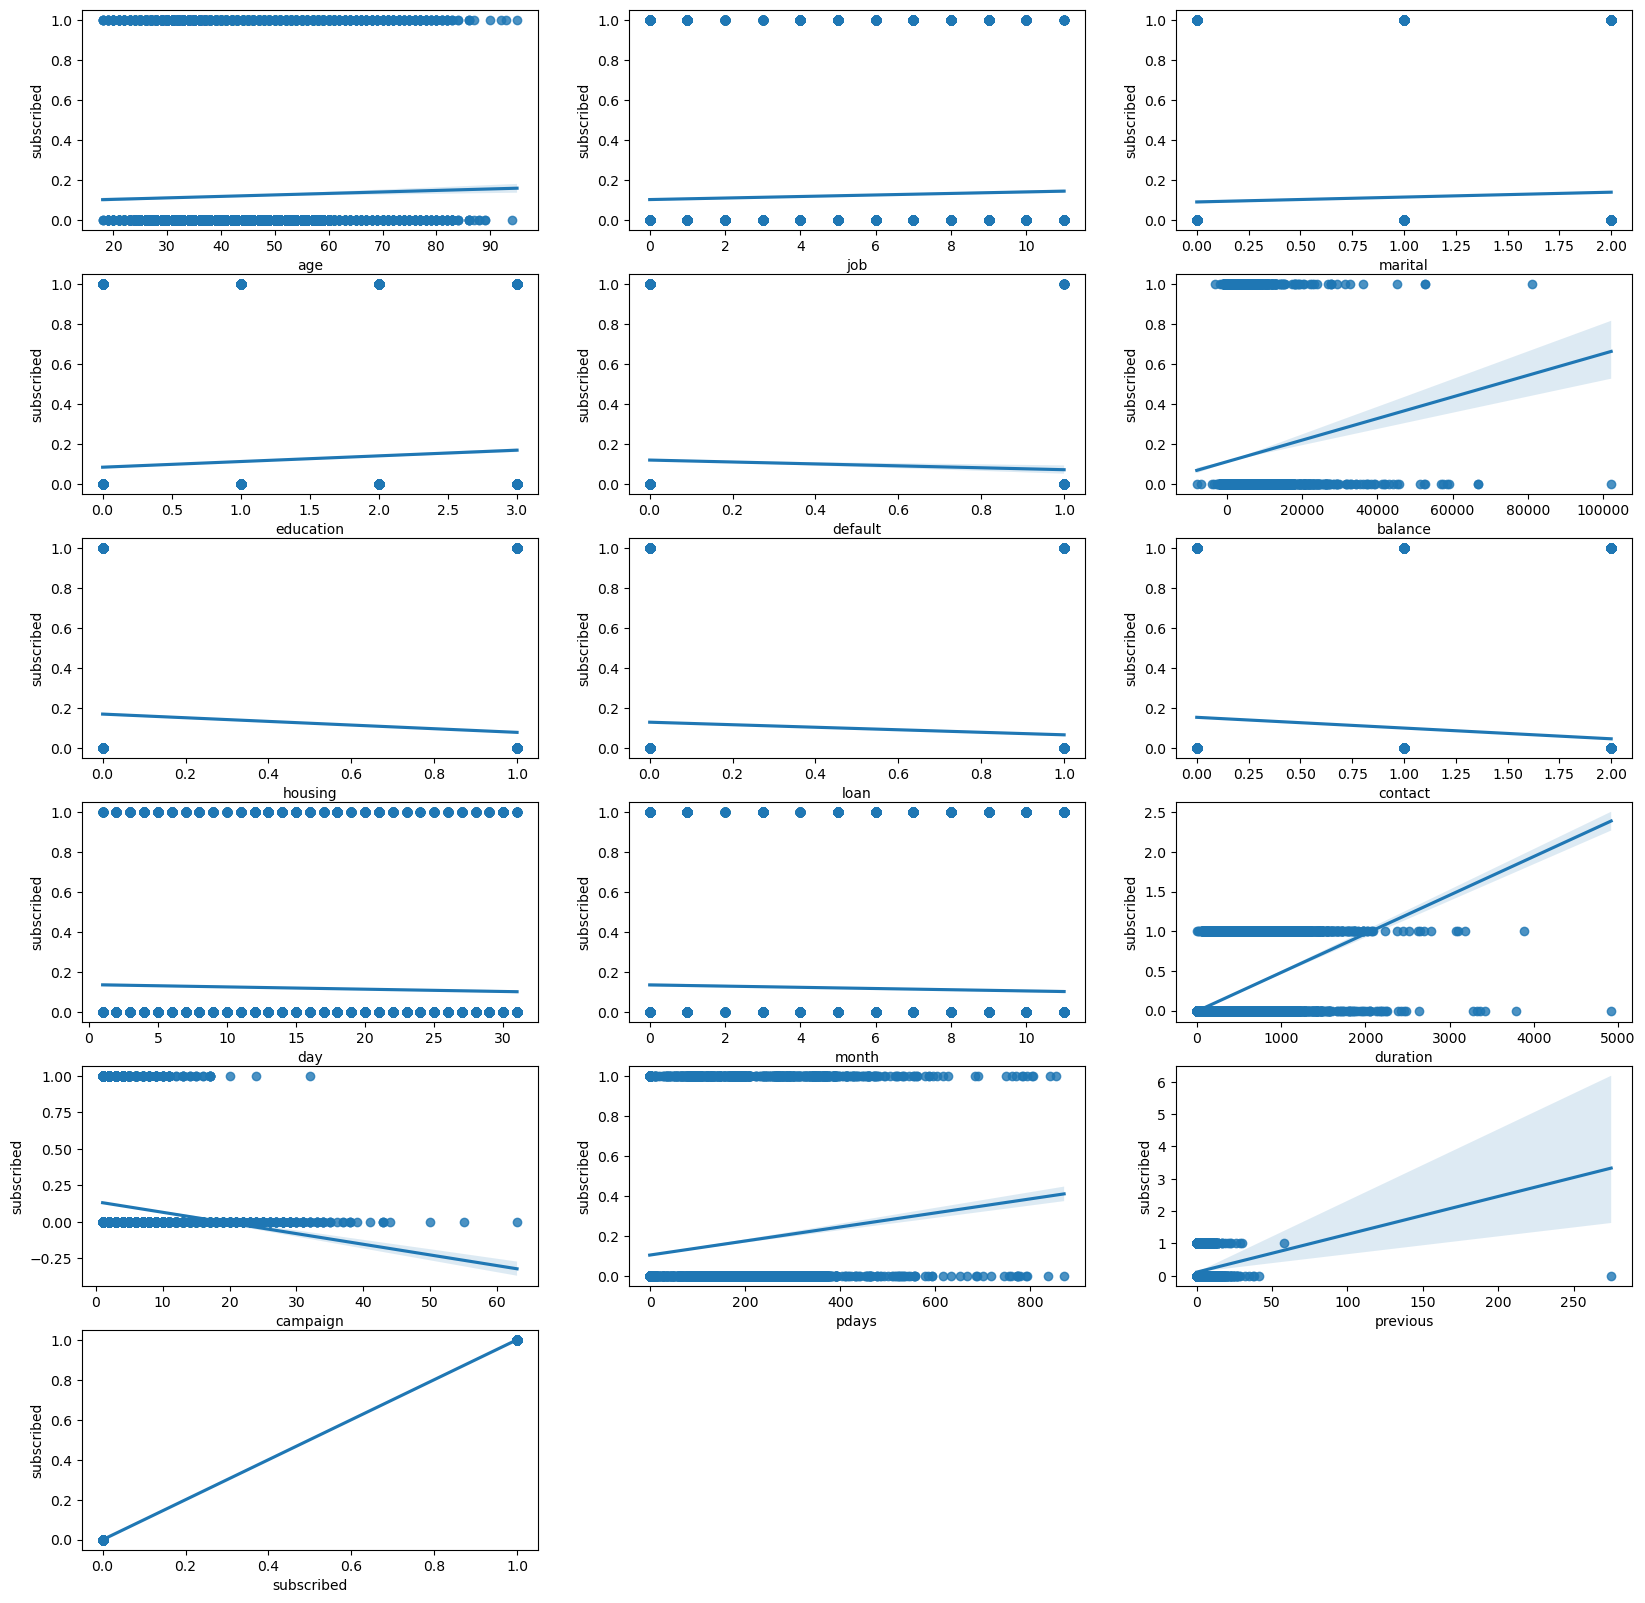

In [232]:
plt.figure(figsize=(20,20))
p=1

for column in df2:
    if p<=17:
        ax=plt.subplot(6,3,p)
        sns.regplot(x=df2[column],y=df2['subscribed'])
        xlabel=df2[column]
    p+=1
plt.show()


In [ ]:
"""""
these graphs show relation with target.Above things are noticed:
appx every age subscribe plan.But when age increasing a slight increase is found
unknown maybe businessmen people unknown people slight high chances of subscription.
divorce represent by 0 married as 1 and single as 2.Single people have slight high chances of subscription.
highly educated people will have high chances of subsciption
a person who default have lower chances of investment
balance is highly and directly related to subscription.(Most imp. factor according to my analysis)
a person who is having loans maybe housing loan or personal loan have lower chances of subscription
how a person is contacted will also matter in subscription cellular 0 telephone 1 and unknon represent by 2.When perosn is contacted 
by cellular high chance of subscription.
day and month i suppose will not effect much as line is appx straight.
duration is direclty proportional to subscription
campaingn is negaltively impacting subscription
pdays is impacting direclty in positive side.when number of days increases high chances of subscription
previous relationship also matter in subscription and direclty proportioal.
previous outcome is negatively impacting as line is downward.
"""""

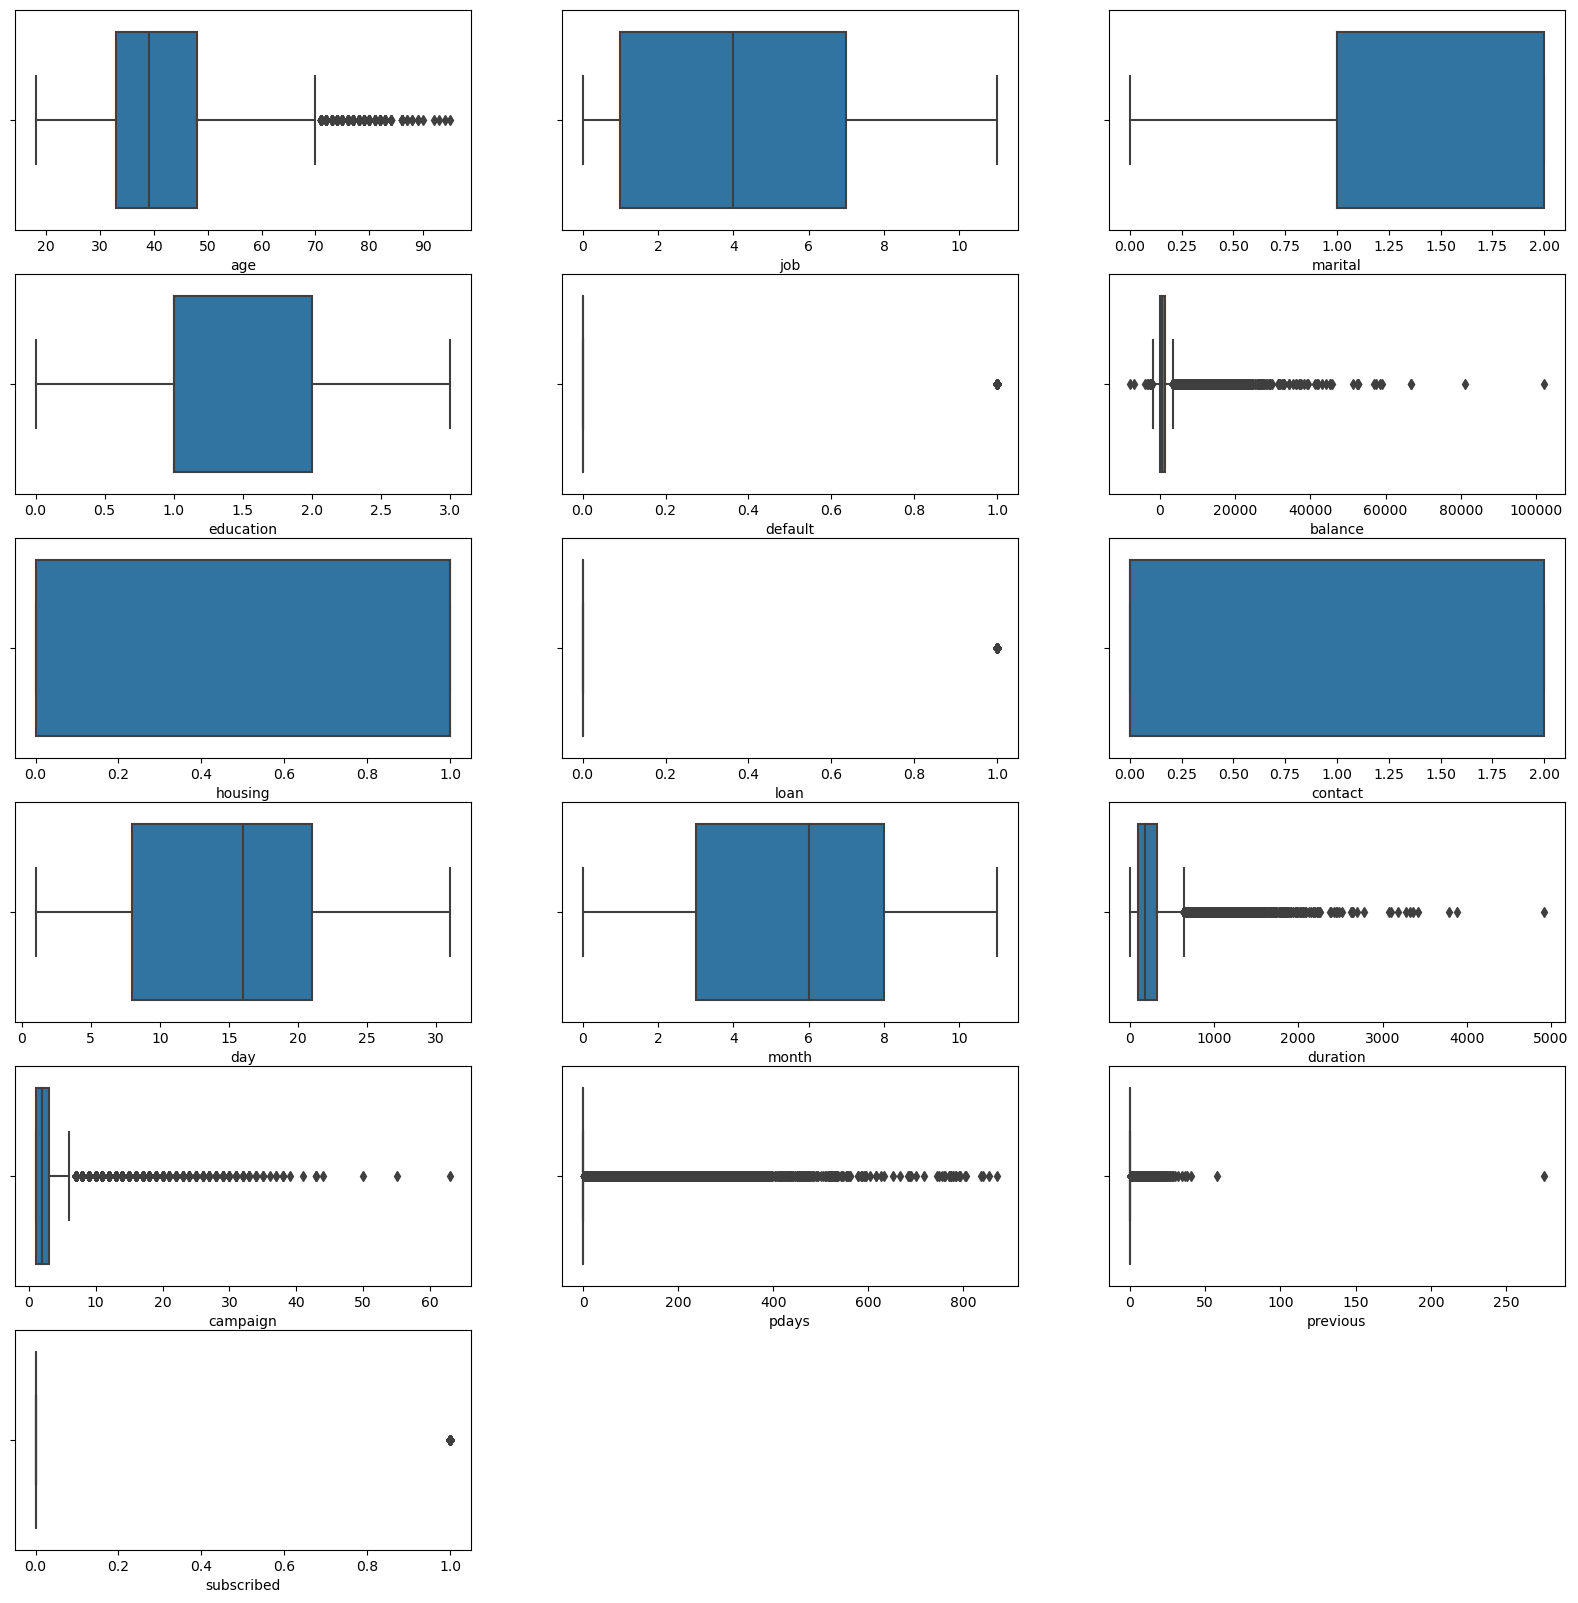

In [233]:
plt.figure(figsize=(20,20))
p=1

for column in df2:
    if p<=17:
        ax=plt.subplot(6,3,p)
        sns.boxplot(df2[column])
        
    p+=1
plt.show()

<AxesSubplot:xlabel='balance', ylabel='Density'>

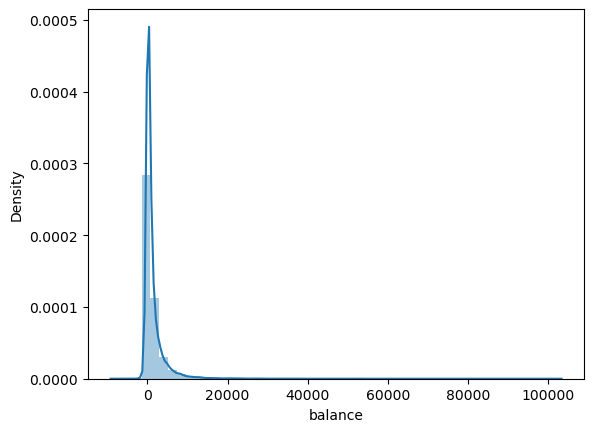

In [234]:
sns.distplot(df2['balance'])

In [ ]:
#balance is having moslty data in outlier.Can be treated as outlier or can be ignore as major data falls in oulier category
# out of 32k rows only 3.2 row is under normal range.So going with as usual

In [235]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)


iqr=q3-q1

In [236]:
print(q1)

print(q3)

age            33.0
job             1.0
marital         1.0
education       1.0
default         0.0
balance        73.0
housing         0.0
loan            0.0
contact         0.0
day             8.0
month           3.0
duration      104.0
campaign        1.0
pdays          -1.0
previous        0.0
subscribed      0.0
Name: 0.25, dtype: float64
age             48.0
job              7.0
marital          2.0
education        2.0
default          0.0
balance       1431.0
housing          1.0
loan             0.0
contact          2.0
day             21.0
month            8.0
duration       318.5
campaign         3.0
pdays           -1.0
previous         0.0
subscribed       0.0
Name: 0.75, dtype: float64


In [237]:
high_age=(q3['age']+1.5*iqr['age'])
high_age

70.5

In [238]:
low_age=(q1['age']-1.5*iqr['age'])
low_age

10.5

In [239]:
AGE=np.where(df2['age']>high_age)
df2=df2.drop(df2.index[AGE])

df2.shape
df2.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,0
1,1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,0
2,2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,0
3,3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,1
4,4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31293,31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,0
31294,31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,1
31295,31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,0
31296,31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0


In [ ]:
""""droping high age outliers """"

In [240]:
from scipy.stats import zscore
feature=df2[['pdays', 'previous', 'duration', 'campaign', 'balance']]
z=np.abs(zscore(feature))
z

,pdays,previous,duration,campaign,balance
0,0.405972,0.233952,0.829478,0.247169,0.196864
1,0.405972,0.233952,0.646774,0.247169,0.450918
2,0.405972,0.233952,0.067561,0.567257,0.152871
3,0.449305,1.005214,2.369798,0.567257,0.651318
4,0.405972,0.233952,0.476666,0.567257,0.411984
...,...,...,...,...,...
31642,0.405972,0.233952,0.549590,0.247169,0.451925
31643,0.405972,0.233952,0.702131,0.247169,0.324383
31644,0.405972,0.233952,0.856690,0.072919,0.347206
31645,2.995010,4.722712,0.915000,1.353273,0.376406


In [241]:
Z=np.where(z>3)

In [242]:
data=df2[(z<3).all(axis=1)]

data.shape

(28036, 16)

In [ ]:
#using Z score so less data is remove

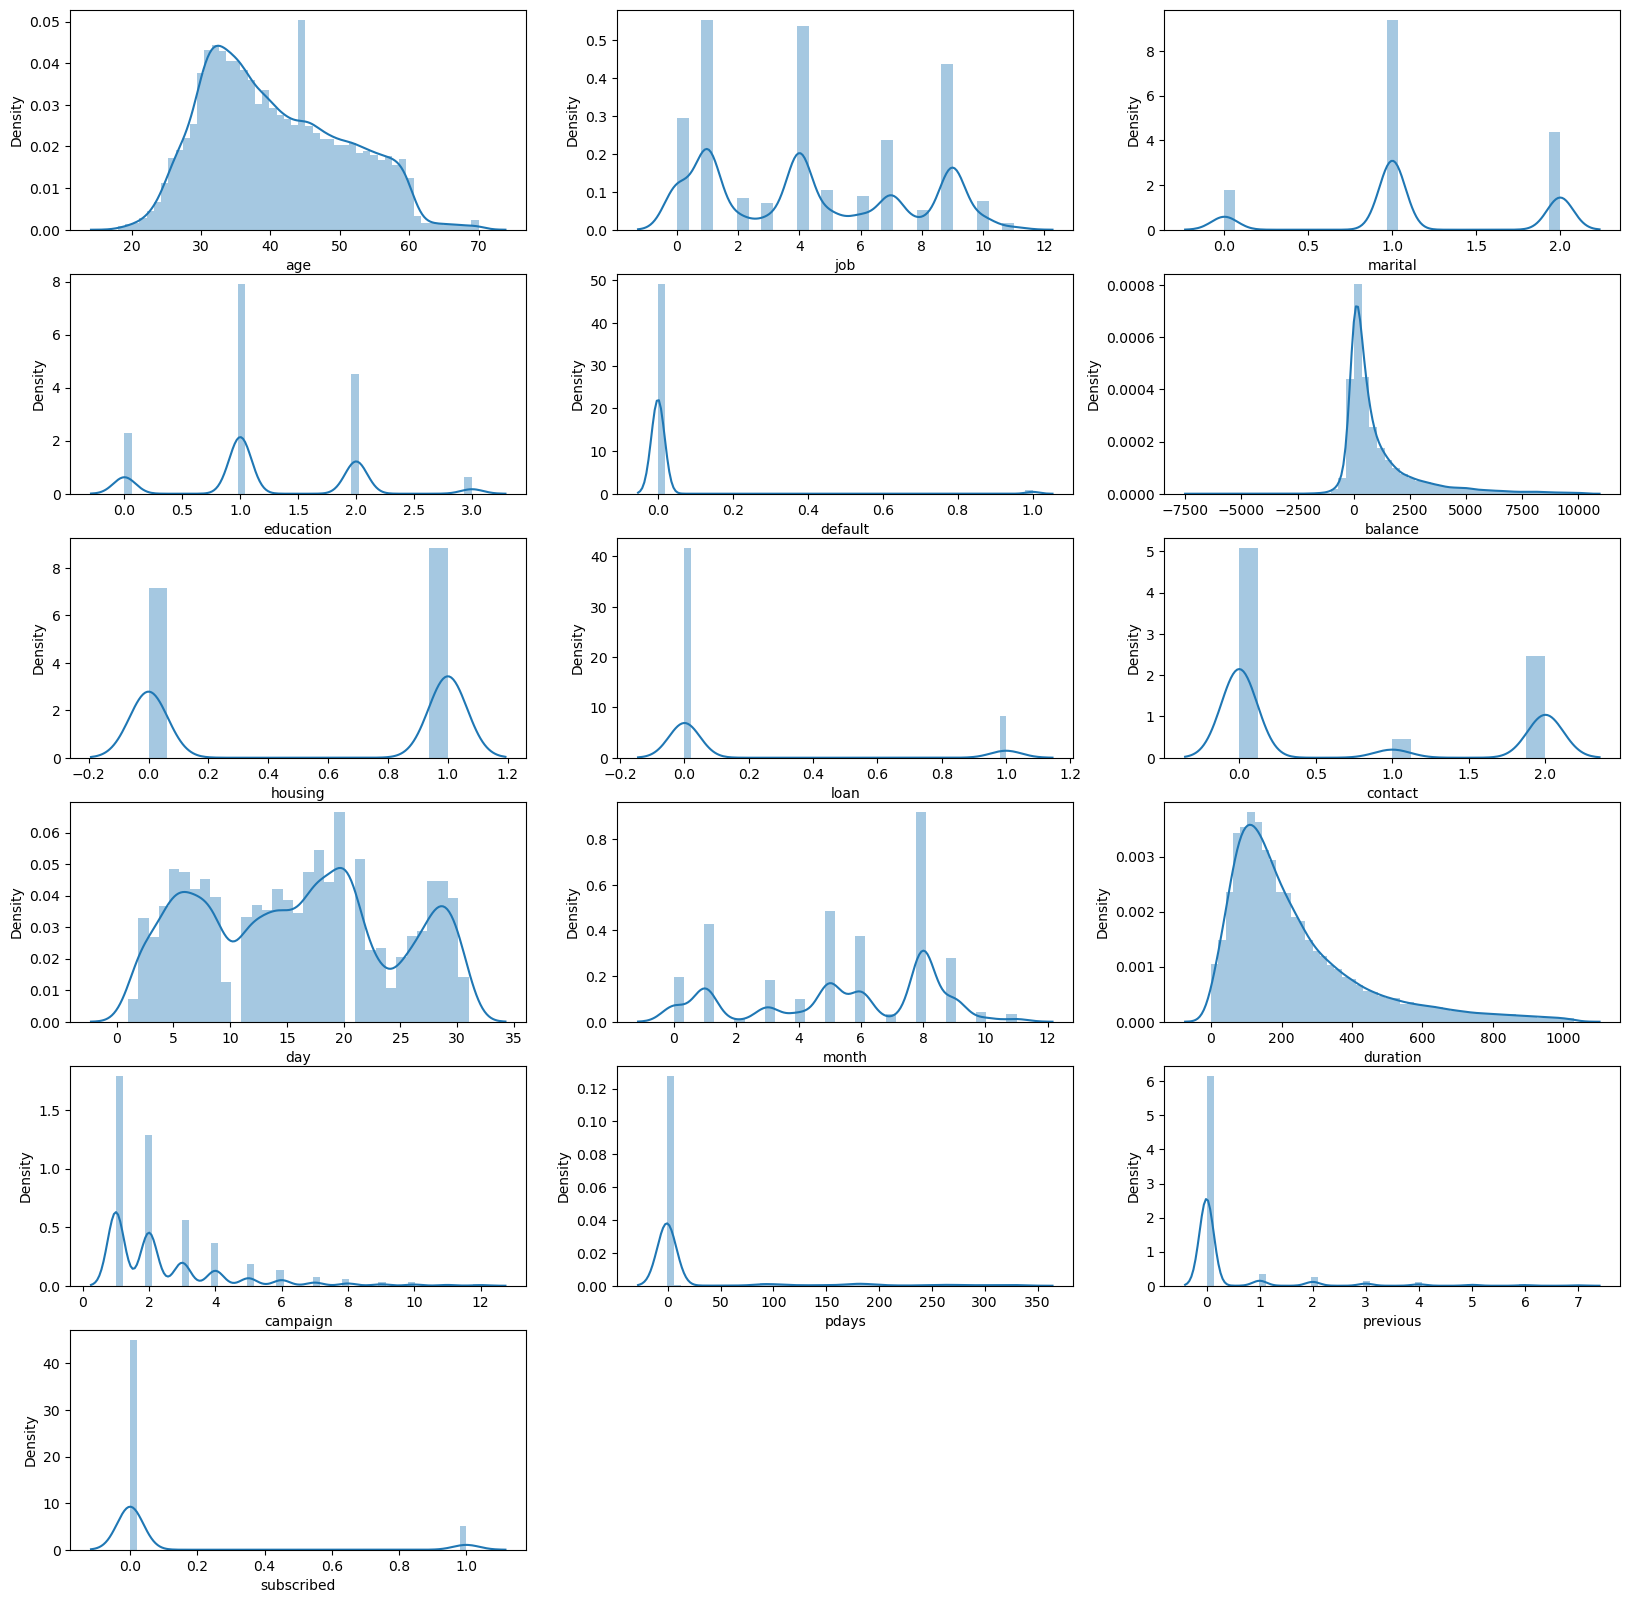

In [243]:
plt.figure(figsize=(20,20))
p=1

for column in data:
    if p<=17:
        ax=plt.subplot(6,3,p)
        sns.distplot(data[column])
        
    p+=1
plt.show()

In [ ]:
#data still not in bell shape
#try to use skewness

In [244]:
data.skew()

age           0.404596
job           0.261488
marital      -0.098091
education     0.199665
default       7.002835
balance       2.416884
housing      -0.209164
loan          1.783334
contact       0.692568
day           0.072983
month        -0.474177
duration      1.600589
campaign      2.060095
pdays         2.832025
previous      3.699528
subscribed    2.651438
dtype: float64

In [245]:
data['balance']=np.cbrt(data['balance'])

data['duration']=np.cbrt(data['duration'])
data['campaign']=np.cbrt(data['campaign'])
data['pdays']=np.cbrt(data['pdays'])
data['previous']=np.cbrt(data['previous'])


In [246]:
data.skew()

age           0.404596
job           0.261488
marital      -0.098091
education     0.199665
default       7.002835
balance      -0.441743
housing      -0.209164
loan          1.783334
contact       0.692568
day           0.072983
month        -0.474177
duration      0.312262
campaign      0.998025
pdays         2.193322
previous      2.306393
subscribed    2.651438
dtype: float64

In [247]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.00000,0
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.00000,0
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.00000,0
3,57,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.44225,1
4,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.000000,0.00000,0
31641,37,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.00000,0
31642,29,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.00000,0
31643,53,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.00000,1


In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
scaler=StandardScaler()


In [250]:
X=data.drop('subscribed',axis=1)
y=data['subscribed']

In [251]:
scaled=scaler.fit_transform(X)

In [252]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.00000
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.00000
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.00000
3,57,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.44225
4,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.000000,0.00000
31641,37,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.00000
31642,29,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.00000
31643,53,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.00000


In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [254]:
vif=variance_inflation_factor

In [255]:
vif=pd.DataFrame()

In [256]:
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['column']=X.columns

In [257]:
vif

,vif,column
0,1.270248,age
1,1.049182,job
2,1.231602,marital
3,1.066894,education
4,1.050924,default
5,1.090399,balance
6,1.169670,housing
7,1.029429,loan
8,1.330449,contact
9,1.026459,day


In [ ]:
#pdays and previous is having high vif so droping pdays

In [266]:
New=X.drop('pdays',axis=1)

In [267]:
New

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,0.00000
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,0.00000
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,0.00000
3,57,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,1.44225
4,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,0.00000
31641,37,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,0.00000
31642,29,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,0.00000
31643,53,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,0.00000


In [268]:
scaled=scaler.fit_transform(New)

In [269]:
vif2=pd.DataFrame()

In [272]:
vif2['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]


In [273]:
vif2

,vif
0,1.270150
1,1.049156
2,1.231541
3,1.066675
4,1.050908
5,1.090355
6,1.158791
7,1.029380
8,1.327192
9,1.026443


In [276]:
from collections import Counter

In [279]:
y.value_counts()

0    25209
1     2827
Name: subscribed, dtype: int64

In [ ]:
""""value count for 1 is very less 
using smote to oversample""""

In [308]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=2,random_state=155,n_jobs=-1)

X_resampled, y_resampled = smote.fit_resample(New, y)

In [309]:
X_resampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,0.000000
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,0.000000
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,0.000000
3,57,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,1.442250
4,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,35,1,1,2,0,16.858566,1,0,2,20,8,9.306237,1.239722,0.000000
50414,63,2,1,1,0,14.298300,0,0,1,8,9,6.382621,1.000000,0.663329
50415,39,0,0,0,0,9.545450,1,0,0,18,9,6.643160,1.000000,0.443868
50416,45,0,1,1,0,13.788138,1,0,0,5,7,6.825558,1.000000,0.607742


In [292]:
from sklearn.neighbors import KNeighborsClassifier

In [293]:
knn=KNeighborsClassifier()

In [310]:
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [311]:
from sklearn.metrics import accuracy_score,classification_report
def table(clf,X_resampled,y_resampled,train=True):
    if train:
        y_pred=clf.predict(X_resampled)
        print("\n-------------train result------------")
        print(f'Acuraccy Score:{accuracy_score(y_resampled,y_pred)}')
   

In [312]:
table(knn,X_resampled,y_resampled,train=True)



-------------train result------------
Acuraccy Score:0.9426990360585505


In [325]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [326]:
cross_val_score(knn,X_resampled,y_resampled,cv=5).mean()

0.9116189140644353

In [327]:
grids={'algorithm':['kd_tree','brute'],
      'leaf_size':[2,3,4,5,6],
      'n_neighbors':[2,4,6,7,8,9,10,11,12,13]}

In [328]:
gridcv=GridSearchCV(knn,param_grid=grids)

In [329]:
gridcv.fit(X_resampled,y_resampled)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6],
                         'n_neighbors': [2, 4, 6, 7, 8, 9, 10, 11, 12, 13]})

In [330]:
gridcv.best_score_

0.9554128460867226

In [333]:
gridcv.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=2)

In [334]:
knn=KNeighborsClassifier(algorithm='kd_tree',
                         leaf_size=2,
                         n_neighbors=2)

In [335]:
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=2)

In [337]:
y_pred=knn.predict(X_resampled)

In [338]:
acc=accuracy_score(y_resampled,y_pred)
acc

0.9991074616208497

In [345]:
test_data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [346]:
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [347]:

for col in test_data.columns:
    if test_data[col].dtype == 'O':
        test_data[col] = le.fit_transform(test_data[col])



In [348]:
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [359]:
ZZ=test_data.drop(['ID','pdays','poutcome'],axis=1)

In [354]:
std=StandardScaler()

In [360]:
test_scale=std.fit_transform(ZZ)

In [361]:
test_scale

array([[-0.83811435,  0.80755146, -0.2765922 , ..., -0.92184885,
         1.05870158, -0.2975003 ],
       [ 3.49998693,  0.19676004, -1.91417256, ...,  0.43996328,
        -0.57485034, -0.2975003 ],
       [-0.9324209 ,  0.50215575,  1.36098816, ...,  1.61607376,
        -0.57485034, -0.2975003 ],
       ...,
       [-0.5551947 ,  0.19676004, -0.2765922 , ..., -0.47306985,
        -0.57485034, -0.2975003 ],
       [-1.121034  , -1.33021853,  1.36098816, ..., -0.19451737,
        -0.24813996,  1.20391138],
       [-1.121034  , -1.33021853, -0.2765922 , ...,  0.31229339,
        -0.57485034,  0.20297026]])

In [362]:
test_scale[1]

array([ 3.49998693,  0.19676004, -1.91417256, -1.64298223, -0.13133597,
        0.46337452, -1.11977897, -0.42956416,  0.4137628 , -1.7783397 ,
       -0.16575268,  0.43996328, -0.57485034, -0.2975003 ])

In [365]:
knn.predict([[3.49998693,  0.19676004, -1.91417256, -1.64298223, -0.13133597,
        0.46337452, -1.11977897, -0.42956416,  0.4137628 , -1.7783397 ,
       -0.16575268,  0.43996328, -0.57485034, -0.2975003]])

array([1])

In [366]:
test_scale[4]

array([ 0.3878708 , -1.02482282, -1.91417256, -0.30105347, -0.13133597,
       -0.66935204, -1.11977897,  2.32794094,  1.53196932, -1.53702315,
       -0.16575268, -0.56978946, -0.57485034, -0.2975003 ])

In [367]:
knn.predict([[ 0.3878708 , -1.02482282, -1.91417256, -0.30105347, -0.13133597,
       -0.66935204, -1.11977897,  2.32794094,  1.53196932, -1.53702315,
       -0.16575268, -0.56978946, -0.57485034, -0.2975003]])

array([0])

In [370]:
import pickle
pickle.dump(data,open('subscribe_data','wb'))